In [22]:
import pandas as pd
import os
import json, urllib.request
import numpy as np

In [2]:
!ls GIRA

ls: cannot access 'GIRA': No such file or directory


Reading the first file: `estacoes-gira-2--semestre-2022.csv`

The join() function from the os.path module creates a path in the format required by the operating system upon which the code is being run (i.e. whatever operating system your computer is running).

In [4]:
! pwd

/home/aline/code/personal_projects/GIRA


In [5]:
# getting the curring working directory
#path = os.getcwd() 
#data_path = os.path.join(path, 'GIRA/')
data_path = '/mnt/d/FinalProject/GIRA'
entries = os.listdir(data_path)

In [6]:
entries

['estacoes-gira-2semestre-2022.csv',
 'JSON_ciclovias.txt',
 'README.md.txt',
 'weather_docas_2020.csv',
 'GIRA_presentation.pdf',
 'GIRA.ipynb',
 'estacoes-gira-1semestre-2022.csv',
 'gira1t2020.xlsx',
 'gira2t2020.xlsx',
 'gira3t2020.xlsx',
 'gira4t2020.xlsx',
 'Gira_2023_05_26.csv',
 'gira_lisboaaberta_one_day2023_05_26.csv',
 'gira---bicicletas-de-lisboa-2021.7z']

In [8]:
df = pd.read_excel(os.path.join(data_path, entries[7]))

In [16]:
df['stationID']=df['desigcomercial'].str.extract(r'(\d{3})')

In [19]:
df['stationID'].unique()

array(['208', '446', '301', '222', '481', '225', '416', '490', '463',
       '432', '421', '306', '450', '218', '406', '114', '108', '472',
       '453', '307', '474', '460', '464', '457', '216', '401', '305',
       '105', '109', '102', '103', '420', '410', '413', '468', '442',
       '107', '480', '415', '430', '433', '483', '403', '104', '449', nan,
       '215', '419', '443', '414', '412', '426', '407', '308', '471',
       '106', '488', '423', '428', '212', '309', '110', '456', '214',
       '224', '452', '101', '417', '462', '115', '487', '408', '112',
       '431', '484', '459', '427', '485', '304', '486', '473', '219',
       '113'], dtype=object)

In [29]:
station_208 = df[df['stationID'] == '208']

In [39]:
station_208.head(3)

,desigcomercial,numbicicletas,numbicicletas__1,numdocasvacias,position,entity_ts,stationID
0,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 00:04:01,208
24,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 00:44:01,208
73,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 02:04:01,208


In [40]:
import matplotlib.pyplot as plt

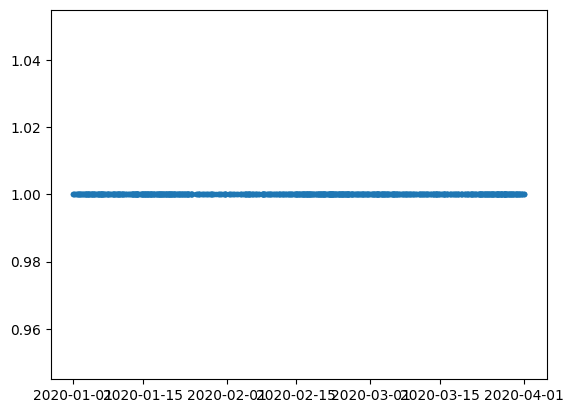

In [44]:
plt.scatter(station_208['entity_ts'], np.ones(len(station_208)), marker='.')

In [47]:
station_208['deltaT'] = station_208['entity_ts'].diff()

/tmp/ipykernel_1399/978771480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_208['deltaT'] = station_208['entity_ts'].diff()


In [48]:
station_208

,desigcomercial,numbicicletas,numbicicletas__1,numdocasvacias,position,entity_ts,stationID,deltaT
0,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 00:04:01,208,NaT
24,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 00:44:01,208,0 days 00:40:00
73,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 02:04:01,208,0 days 01:20:00
85,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 02:24:01,208,0 days 00:20:00
305,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 07:04:01,208,0 days 04:40:00
...,...,...,...,...,...,...,...,...
99429,208 - Cais das Pombas,4,4,18,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-03-31 15:25:03,208,0 days 00:18:00
99453,208 - Cais das Pombas,4,4,18,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-03-31 15:46:03,208,0 days 00:21:00
99862,208 - Cais das Pombas,2,2,20,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-03-31 21:10:03,208,0 days 05:24:00
99929,208 - Cais das Pombas,2,2,20,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-03-31 22:26:03,208,0 days 01:16:00


Time step is not homogeneous. I was thinking about group it in 'morning', 'lunch time', 'afternoon', 'night'. Which metric to use on the number of bicicles? Mean?

In [5]:
df = pd.read_csv(os.path.join(data_path, entries[0])).head(3)

In [9]:
df

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,135 - Avenida Cidade de Lourenço Marques / Val...,7,20,"{""coordinates"":[-9.118689,38.764067],""type"":""P...",2022-07-27T15:53:45.206Z,active
1,456 - Entrecampos / Av. das Forças Armadas,18,41,"{""coordinates"":[-9.14872,38.74877],""type"":""Poi...",2022-07-27T15:53:46.819Z,active
2,132 - Avenida de Berlim / Rua Cidade de Cabinda,2,25,"{""coordinates"":[-9.11255,38.76829],""type"":""Poi...",2022-07-27T15:53:44.936Z,active


In [8]:
df['entity_ts']

0    2022-07-27T15:53:45.206Z
1    2022-07-27T15:53:46.819Z
2    2022-07-27T15:53:44.936Z
Name: entity_ts, dtype: object

In [10]:
df_time = pd.read_csv('GIRA/estacoes-gira-2--semestre-2022.csv', usecols=['entity_ts'])

In [25]:
df_time['dt'] = pd.to_datetime(df_time['entity_ts'])

In [26]:
df_time.dtypes

entity_ts                 object
dt           datetime64[ns, UTC]
dtype: object

In [29]:
df_time['dt']

0         2022-07-27 15:53:45.206000+00:00
1         2022-07-27 15:53:46.819000+00:00
2         2022-07-27 15:53:44.936000+00:00
3         2022-07-27 15:53:40.553000+00:00
4         2022-07-27 15:53:46.255000+00:00
                        ...               
2382891          2023-02-16 11:47:16+00:00
2382892          2023-02-16 11:47:16+00:00
2382893          2023-02-16 12:27:31+00:00
2382894          2023-02-16 12:07:30+00:00
2382895          2023-02-16 12:27:31+00:00
Name: dt, Length: 2382896, dtype: datetime64[ns, UTC]

In [30]:
df.columns

Index(['desigcomercial', 'numbicicletas', 'numdocas', 'position', 'entity_ts',
       'estado'],
      dtype='object')

2382896 observations with distinct time distribution, from 27 of June, 2022 to 16 of February, 2023 (about 6 months long). Info about station name, number of bicicles, number os docs (constant), position information (as string) and a date string. Will be cosidered as time series?

In [42]:
entries

['estacoes-gira-2--semestre-2022.csv',
 'JSON_ciclovias.txt',
 'micromobilityoutput.xlsx',
 'pdapgilgira1t2020.xlsx',
 'pdapgilgira2t2020.xlsx',
 'pdapgilgira3t2020.xlsx',
 'pdapgilgira4t2020.xlsx',
 'README.md.txt',
 'gira-bicicletas-de-lisboa.jsonld',
 'gira_lisboaaberta.csv',
 'Gira - Bicicletas de Lisboa 1semestre 2022.csv',
 'Gira - Bicicletas de Lisboa.csv',
 'master_table_docas_2020_v4.csv']

In [48]:
df = pd.read_excel(os.path.join(data_path, entries[3])).head(10)

In [49]:
df

,desigcomercial,numbicicletas,numbicicletas__1,numdocasvacias,position,entity_ts
0,208 - Cais das Pombas,0,0,22,"{'coordinates': [-9.14373, 38.70523], 'type': ...",2020-01-01 00:04:01
1,446 - Av. República / Interface Entrecampos,32,32,8,"{'coordinates': [-9.14773, 38.74456], 'type': ...",2020-01-01 00:04:01
2,301 - Avenida da Liberdade / Restauradores,22,22,0,"{'coordinates': [-9.14242, 38.71702], 'type': ...",2020-01-01 00:04:01
3,222 - Praça da Figueira,0,0,30,"{'coordinates': [-9.13828, 38.71383], 'type': ...",2020-01-01 00:04:01
4,481 - Campo Grande / Museu da Cidade,20,20,0,"{'coordinates': [-9.156169, 38.758207], 'type'...",2020-01-01 00:04:01
5,225 - Martim Moniz,10,10,6,"{'coordinates': [-9.13694, 38.71526], 'type': ...",2020-01-01 00:04:01
6,416 - Av. República / Avenida Duque de Ávila,7,7,9,"{'coordinates': [-9.14553, 38.735304], 'type':...",2020-01-01 00:04:01
7,490 - Rua Fernando Namora / Azinhaga da Torre ...,10,10,6,"{'coordinates': [-9.17849, 38.76026], 'type': ...",2020-01-01 00:04:01
8,463 - Campo Grande / Av. da Igreja,10,10,0,"{'coordinates': [-9.14951, 38.75243], 'type': ...",2020-01-01 00:24:01
9,432 - Praça de Londres,3,3,7,"{'coordinates': [-9.1377, 38.7407], 'type': 'P...",2020-01-01 00:24:01


In [58]:
# getting url of json file from txt
with open(os.path.join(data_path, entries[1]), 'r') as input_file:
    json_url = input_file.readline()

    # loading json file from url 
with urllib.request.urlopen(json_url) as url:
    data = json.load(url)
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 89601,
   'geometry': {'type': 'LineString',
    'coordinates': [[-9.19481223586829, 38.7554506663858],
     [-9.19477936704362, 38.7554721044496],
     [-9.1947590530364, 38.7554856646461],
     [-9.19475497724491, 38.7554877649405],
     [-9.19475053006148, 38.7554893417396],
     [-9.19474582116133, 38.7554903561569],
     [-9.19474096667407, 38.7554907831749],
     [-9.19473608631972, 38.7554906122628],
     [-9.1947335957695, 38.7554901493542],
     [-9.19473122425264, 38.7554893968674],
     [-9.19472902678099, 38.7554883722578],
     [-9.1947270543291, 38.7554870992931],
     [-9.19472015391039, 38.7554798521474],
     [-9.19471007098407, 38.7554668697415],
     [-9.19470151329438, 38.7554532376913],
     [-9.19469347022761, 38.7554403970126],
     [-9.19468274631555, 38.7554288087696]]},
   'properties': {'OBJECTID': 89601,
    'COD_SIG': '0000456',
    'COD_VIA': '67183',
    'DESIGNACAO': 'Avenida Marech

In [59]:
entries

['estacoes-gira-2--semestre-2022.csv',
 'JSON_ciclovias.txt',
 'micromobilityoutput.xlsx',
 'pdapgilgira1t2020.xlsx',
 'pdapgilgira2t2020.xlsx',
 'pdapgilgira3t2020.xlsx',
 'pdapgilgira4t2020.xlsx',
 'README.md.txt',
 'gira-bicicletas-de-lisboa.jsonld',
 'gira_lisboaaberta.csv',
 'Gira - Bicicletas de Lisboa 1semestre 2022.csv',
 'Gira - Bicicletas de Lisboa.csv',
 'master_table_docas_2020_v4.csv']

In [7]:
df = pd.read_csv(os.path.join(data_path, entries[9]))

In [8]:
df

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,417 - Av. Duque de Ávila / Jardim Arco Do Cego,3,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-01-01T13:38:03.130Z,active
1,446 - Av. República / Interface Entrecampos,25,40,"{""coordinates"":[-9.14773,38.74456],""type"":""Poi...",2022-01-01T13:38:04.625Z,active
2,416 - Av. República / Avenida Duque de Ávila,6,16,"{""coordinates"":[-9.14553,38.735304],""type"":""Po...",2022-01-01T13:38:03.751Z,active
3,103 - Jardim da Água,16,20,"{""coordinates"":[-9.095019,38.761218],""type"":""P...",2022-01-01T13:38:04.204Z,active
4,415 - Av. Duque de Ávila / Av. Conde Valbom,9,20,"{""coordinates"":[-9.148443,38.735188],""type"":""P...",2022-01-01T13:38:04.179Z,active
...,...,...,...,...,...,...
1555391,486 - Rua Hermano Neves / Rua José Escada,2,14,"{""coordinates"":[-9.16985,38.75954],""type"":""Poi...",2022-06-30T10:33:28.035Z,active
1555392,417 - Av. Duque de Ávila / Jardim Arco Do Cego,9,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-06-30T10:33:25.612Z,active
1555393,449 - Av. 5 de Outubro / Rua da Cruz Vermelha,0,14,"{""coordinates"":[-9.150085,38.746836],""type"":""P...",2022-06-30T10:13:36.074Z,active
1555394,479 - Rua Professor Oliveira Marques,13,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-30T10:13:37.004Z,active


In [77]:
df['desigcomercial']

0                                          520 - Lispolis
1             513 - Rua Guiomar Torresão/Metro de Carnide
2                  436 - Instituto Português de Oncologia
3                             106 - Jardim Garcia da Orta
4                    479 - Rua Professor Oliveira Marques
                              ...                        
9938                             366 - Palacio da justiça
9939                               110 - Rua de Moscavide
9940        464 - Av. da Igreja / Rua Afonso Lopes Vieira
9941    151 - Rua Contra Almirante Ferraz / Escola Sec...
9942      150 - Avenida Dr. Francisco Luis Gomes / Go Fit
Name: desigcomercial, Length: 9943, dtype: object

In [13]:
df['stationID']=df['desigcomercial'].str.extract(r'(\d{3})')

In [18]:
df.head(3)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,stationID
0,417 - Av. Duque de Ávila / Jardim Arco Do Cego,3,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-01-01T13:38:03.130Z,active,417
1,446 - Av. República / Interface Entrecampos,25,40,"{""coordinates"":[-9.14773,38.74456],""type"":""Poi...",2022-01-01T13:38:04.625Z,active,446
2,416 - Av. República / Avenida Duque de Ávila,6,16,"{""coordinates"":[-9.14553,38.735304],""type"":""Po...",2022-01-01T13:38:03.751Z,active,416


In [19]:
df['position'][0]



'{"coordinates":[-9.142703,38.735352],"type":"Point"}'

Estracting coordinates from position column using regex

In [24]:
df['lat'] = df['position'].str.extract(r'(-[0-9]+.[0-9]+),[0-9]+.[0-9]+')
df['lon'] = df['position'].str.extract(r'-[0-9]+.[0-9]+,([0-9]+.[0-9]+)')

In [25]:
df[['lat', 'lon']]

,lat,lon
0,-9.142703,38.735352
1,-9.14773,38.74456
2,-9.14553,38.735304
3,-9.095019,38.761218
4,-9.148443,38.735188
...,...,...
1555391,-9.16985,38.75954
1555392,-9.142703,38.735352
1555393,-9.150085,38.746836
1555394,-9.15724,38.75491


In [26]:
df.head(3)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,stationID,coordinates,lat,lon
0,417 - Av. Duque de Ávila / Jardim Arco Do Cego,3,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-01-01T13:38:03.130Z,active,417,-9.142703,-9.142703,38.735352
1,446 - Av. República / Interface Entrecampos,25,40,"{""coordinates"":[-9.14773,38.74456],""type"":""Poi...",2022-01-01T13:38:04.625Z,active,446,-9.14773,-9.14773,38.74456
2,416 - Av. República / Avenida Duque de Ávila,6,16,"{""coordinates"":[-9.14553,38.735304],""type"":""Po...",2022-01-01T13:38:03.751Z,active,416,-9.14553,-9.14553,38.735304


In [27]:
df['datetime'] = pd.to_datetime(df['entity_ts'])

In [28]:
df

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,stationID,coordinates,lat,lon,datetime
0,417 - Av. Duque de Ávila / Jardim Arco Do Cego,3,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-01-01T13:38:03.130Z,active,417,-9.142703,-9.142703,38.735352,2022-01-01 13:38:03.130000+00:00
1,446 - Av. República / Interface Entrecampos,25,40,"{""coordinates"":[-9.14773,38.74456],""type"":""Poi...",2022-01-01T13:38:04.625Z,active,446,-9.14773,-9.14773,38.74456,2022-01-01 13:38:04.625000+00:00
2,416 - Av. República / Avenida Duque de Ávila,6,16,"{""coordinates"":[-9.14553,38.735304],""type"":""Po...",2022-01-01T13:38:03.751Z,active,416,-9.14553,-9.14553,38.735304,2022-01-01 13:38:03.751000+00:00
3,103 - Jardim da Água,16,20,"{""coordinates"":[-9.095019,38.761218],""type"":""P...",2022-01-01T13:38:04.204Z,active,103,-9.095019,-9.095019,38.761218,2022-01-01 13:38:04.204000+00:00
4,415 - Av. Duque de Ávila / Av. Conde Valbom,9,20,"{""coordinates"":[-9.148443,38.735188],""type"":""P...",2022-01-01T13:38:04.179Z,active,415,-9.148443,-9.148443,38.735188,2022-01-01 13:38:04.179000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
1555391,486 - Rua Hermano Neves / Rua José Escada,2,14,"{""coordinates"":[-9.16985,38.75954],""type"":""Poi...",2022-06-30T10:33:28.035Z,active,486,-9.16985,-9.16985,38.75954,2022-06-30 10:33:28.035000+00:00
1555392,417 - Av. Duque de Ávila / Jardim Arco Do Cego,9,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-06-30T10:33:25.612Z,active,417,-9.142703,-9.142703,38.735352,2022-06-30 10:33:25.612000+00:00
1555393,449 - Av. 5 de Outubro / Rua da Cruz Vermelha,0,14,"{""coordinates"":[-9.150085,38.746836],""type"":""P...",2022-06-30T10:13:36.074Z,active,449,-9.150085,-9.150085,38.746836,2022-06-30 10:13:36.074000+00:00
1555394,479 - Rua Professor Oliveira Marques,13,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-30T10:13:37.004Z,active,479,-9.15724,-9.15724,38.75491,2022-06-30 10:13:37.004000+00:00


Checking one station

In [32]:
station01 = df[df['stationID'] == '479']

In [33]:
station01.shape

(12684, 11)

In [34]:
station01

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,stationID,coordinates,lat,lon,datetime
81,479 - Rua Professor Oliveira Marques,6,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-01-01T19:18:10.953Z,active,479,-9.15724,-9.15724,38.75491,2022-01-01 19:18:10.953000+00:00
201,479 - Rua Professor Oliveira Marques,6,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-01-02T06:45:26.830Z,active,479,-9.15724,-9.15724,38.75491,2022-01-02 06:45:26.830000+00:00
270,479 - Rua Professor Oliveira Marques,7,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-01-02T11:05:18.074Z,active,479,-9.15724,-9.15724,38.75491,2022-01-02 11:05:18.074000+00:00
377,479 - Rua Professor Oliveira Marques,7,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-01-03T00:05:33.179Z,active,479,-9.15724,-9.15724,38.75491,2022-01-03 00:05:33.179000+00:00
392,479 - Rua Professor Oliveira Marques,7,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-01-02T23:45:34.339Z,active,479,-9.15724,-9.15724,38.75491,2022-01-02 23:45:34.339000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
1555127,479 - Rua Professor Oliveira Marques,1,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-28T21:12:51.392Z,active,479,-9.15724,-9.15724,38.75491,2022-06-28 21:12:51.392000+00:00
1555173,479 - Rua Professor Oliveira Marques,1,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-29T03:32:59.486Z,active,479,-9.15724,-9.15724,38.75491,2022-06-29 03:32:59.486000+00:00
1555276,479 - Rua Professor Oliveira Marques,6,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-29T18:13:18.262Z,active,479,-9.15724,-9.15724,38.75491,2022-06-29 18:13:18.262000+00:00
1555321,479 - Rua Professor Oliveira Marques,1,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-30T00:33:24.871Z,active,479,-9.15724,-9.15724,38.75491,2022-06-30 00:33:24.871000+00:00


In [37]:
import matplotlib.pyplot as plt
import numpy as np

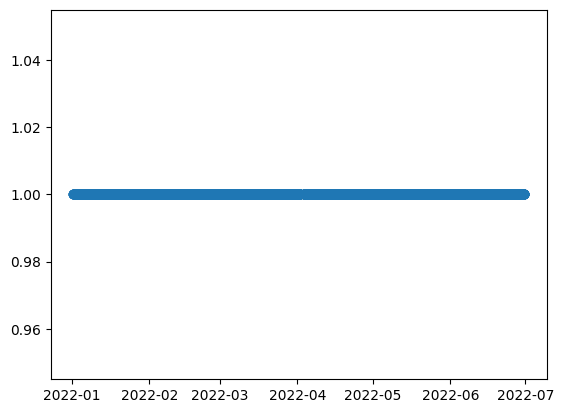

In [42]:
plt.scatter(station01['datetime'], np.ones(len(station01['datetime'])))

In [43]:
station01['datetime'].to_timestamp().to_julian_date()

TypeError: unsupported Type Int64Index